In [23]:
import time, numpy as np, math

**test examples first!**

**beware edge cases**

17a

In [99]:
ROCK_DATA='''####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##'''
def to_rock(s):
    rows=s.split('\n')
    return {(c,len(rows)-1-r)
            for r,row in enumerate(rows)
            for c,ch in enumerate(row) if ch=='#'}
shifted=lambda S,r1,c1:{(r+r1,c+c1) for r,c in S}
ROCKS=list(map(to_rock,ROCK_DATA.split('\n\n')))
ROCKS

[{(0, 0), (1, 0), (2, 0), (3, 0)},
 {(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)},
 {(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)},
 {(0, 0), (0, 1), (0, 2), (0, 3)},
 {(0, 0), (0, 1), (1, 0), (1, 1)}]

In [129]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
for _ in range(2022):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

3130


17b

In [165]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
floors=[floor]
for _ in range(100_000):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    floors.append(floor)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

155657


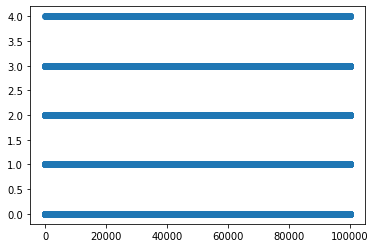

In [171]:
import matplotlib.pyplot as plt
plt.figure()
A=np.array(floors)
plt.scatter(range(len(A)-1),A[1:]-A[:-1])
plt.show()

In [174]:
for v in A[1:]-A[:-1]:
    print(v,end='')
print('')

1224000100030301321212320130220022013300130400020013320023021224213300122201302203340130021324013320123221334013302130021330013040123401332013211121201303213220130300332013220132201220013201033221212212302022111330213320122401324013300132221334013300133201322010310123000303212200132001332010342132121031103030133201220013320121221330012340022021334000130023221330012340133201334000100133001304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300

2013240132201302013342133001330212340122221332013300012401332212300132121321113040022201330013302133021334012142123021330203000032011230212302132001321213202030301230013300023201302013300130301121213200133001324013340133221304000340122401031213202133221334013242133001221202342122401232013320121201303013300121221322010310133020232012340121301300203240133201330013222003201330013201103120220012322122201230203200133221324000202030300230202300122111332013320133001330213212133201330013201121201330002320133001334013240023001220013202133421230213302132000303013212121201322012300112111121213220133401212002320022001330002120132201213013342132201234213200132201234200320133000130213300122200230103302112401332212202030110302012220122201303213340003001213001210123021031002300133221122013222133021232213302121200301013011122221322213222122201334000302003400200213300121221322012132123010322013300133220320013320023201330213030132201332013202133401332213220021201332212222133001300013201030400232013200133

In [175]:
D=A[1:]-A[:-1]
start='1224000100030301321212320130220022013300130400020013320023021224213300122201302203340130021324013320123221334013302130021330013040123401332013211121201303213220130300332013220132201220013201033221212212302022111330213320122401324013300132221334013300133201322010310123000303212200132001332010342132121031103030133201220013320121221330012340022021334000130023221330012340133201334000100133001304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300132220032013300132011031202200123221222012302032001332213240002020303002302023001221113320133201330013302132121332013300132011212013300023201330013340132400230012200132021334212302133021320003030132121212013220123001121111212132201334012120023200220013300021201322012130133421322012342132001322012342003201330001302133001222002301033021124013322122020301103020122201222013032133400030012130012101230210310023'
period='001332211220132221330212322133021212003010130111222213222132221222013340003020034002002133001212213220121321230103220133001332203200133200232013302130301322013320132021334013322132200212013322122221330013000132010304002320132001330012222132000222013042123401303013340130321303012342130300304012240133401332213020030301330012320030001320013302133021330013320123001322013220130201220012300133021324000300123200232013222103100332013320133200034203030130221220013300023001304002200032220221003240132101304013300133221212012301133400200013032130221232003012130011224003001133401212013220133401332013300123001210103320133001303213342133021322013222132201213212301133400222013340133201130202300133201232013200133221304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300132220032013300132011031202200123221222012302032001332213240002020303002302023001221113320133201330013302132121332013300132011212013300023201330013340132400230012200132021334212302133021320003030132121212013220123001121111212132201334012120023200220013300021201322012130133421322012342132001322012342003201330001302133001222002301033021124013322122020301103020122201222013032133400030012130012101230210310023'
B=list(map(int,start))
while len(B)<len(D):
    B.extend(map(int,period))
assert np.array_equal(B[:len(D)],D)
#partial differences are periodic!

In [176]:
T=10**12
Lstart=list(map(int,start))
Lperiod=list(map(int,period))
P=len(Lperiod)
tot=sum(Lstart)
nrem=T-len(Lstart)
tot+=sum(Lperiod)*(nrem//P)
tot+=sum(Lperiod[:(nrem%P)])
tot

1556521739139

other failed attempts on 17b

In [160]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
st=time.time()
stage={p:'-' for p in board}
gap=0
for _ in range(10**6):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    sh_rck=shifted(rck,px,py)
    board.update(sh_rck)
    for p in sh_rck:
        stage[p]=_//len(ROCKS)
    gap=max(gap,floor-py)
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
    if _%100_000==0 or _==2021:
        print(time.time()-st,_,floor,gap)
print(floor,gap)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(stage.get((x,y),'.'),end='')
#     print('')

0.18091917037963867 0 1 0
0.22905611991882324 2021 3130 34
2.589473009109497 100000 155658 34
4.972333192825317 200000 311308 34
7.347931861877441 300000 466959 34
9.733446836471558 400000 622609 34
12.078068017959595 500000 778266 34


KeyboardInterrupt: 

In [164]:
with open('in.txt') as f:
    jet=f.read()
W=7
dpH=35
board={(x,y) for x in range(W) for y in range(0,-dpH,-1)}
floor=0
t,r=0,0
st=time.time()
stage={p:'-' for p in board}
states={(frozenset(board),t,r)}
for _ in range(10**6):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    sh_rck=shifted(rck,px,py)
    board.update(sh_rck)
    for p in sh_rck:
        stage[p]=_//len(ROCKS)
    gap=max(gap,floor-py)
    floor=max(floor,py+wy)
    states.add((frozenset({(x,y) for x,y in board if y>floor-dpH}),t,r))
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
    if _%2_000==0 or _==2021:
        print(time.time()-st,_,floor,len(states))
print(floor,gap)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(stage.get((x,y),'.'),end='')
#     print('')

0.0005681514739990234 0 1 34 2
1.0519750118255615 2000 3101 34 2002
1.072876214981079 2021 3130 34 2023
4.285904884338379 4000 6226 34 4002
11.25725507736206 6000 9354 34 6002
22.978342056274414 8000 12473 34 8002
40.137227058410645 10000 15576 34 10002


KeyboardInterrupt: 

In [157]:
#incorrect
with open('in.txt') as f:
    jet=f.read()
W=7
ground=[0]*W
t,r=0,0
for _ in range(2022):
    rck=ROCKS[r]
    okay=lambda px,py : all(x>=0 and x<W and y>ground[x] for x,y in shifted(rck,px,py))
    px,py=2,max(ground)+4
    while True:
        sh=jet[t]
        if sh=='>':
            if okay(px+1,py):
                px+=1
        else:
            if okay(px-1,py):
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if not(okay(px,py-1)):
            break
        py-=1
    #print(px,py)
    for x,y in shifted(rck,px,py):
        ground[x]=max(ground[x],y)
    r=(r+1)%len(ROCKS)
    if _%100_000==0:
        print(time.time()-st,_,max(ground),ground)
print(time.time()-st,_,max(ground),ground)

704.3453140258789 0 1 [0, 1, 1, 1, 1, 0, 0]
704.4167308807373 2021 3155 [3119, 3152, 3154, 3155, 3154, 3145, 3145]


In [138]:
'''
FAILED DP IDEA:
assume that after every cycle of placing all 5 types of rocks,
that we only need to consider the section of the board
    consisting of the last 5 rocks we just placed
'''
def next_state(t_st,nrocks=len(ROCKS)): #current jet index is t
    W=7
    board={(x,0) for x in range(W)}
    floor=0
    t,r=t_st,0
    if nrocks>len(ROCKS):
        raise
    for rck in ROCKS[:nrocks]:
        wx,wy=max(x for x,y in rck),max(y for x,y in rck)
        px,py=2,floor+4
        #print('\t',px,py,wx,wy,W-1-wx)
        while True:
            sh=jet[t]
            if sh=='>':
                if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                    px+=1
            else:
                if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                    px-=1
            t=(t+1)%len(jet)
            #print('\t',sh,px,py)
            if len(shifted(rck,px,py-1)&board)>0:
                break
            py-=1
        board.update(shifted(rck,px,py))
        floor=max(floor,py+wy)
    return t,floor
t,floor=0,0
cnt=2022
for _ in range(cnt//len(ROCKS)):
    ret=next_state(t)
    t,floor=ret[0],floor+ret[1]
ret=next_state(t,cnt%len(ROCKS))
t,floor=ret[0],floor+ret[1]
t,floor

(660, 3344)

In [ ]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
#amount that floor will increase by
#    is completely determined by set of rocks at the floor row
#    and the three rows below it,
#    as well as the t and r counters
def next_state(window,t,r):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    return ..,t,(r+1)%len(ROCKS)
for _ in range(2022):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

16a

In [20]:
def parse():
    with open('in.txt') as f:
        vals,G={},{}
        for l in f.read().split('\n'):
            p0,p1=l.split('; ')
            p0=p0.split(' ')
            v=p0[1]
            vals[v]=int(p0[-1].split('=')[-1])
            p1=(p1.split('valve ') if p1.find('valve ')>=0
                else p1.split('valves '))[-1]
            G[v]=p1.split(', ')
    return vals,G

In [43]:
vals,G=parse()
'''opened=set()
n_useful=sum(1 for v,p in vals.items() if p>0)
stats=[0]
st,mark,work=time.time(),0,0
def dfs(step,v,pressure,scr):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,step,v,pressure,scr,stats)
        mark+=5
    work+=1
    if step==30:
        stats[0]=max(stats[0],scr)
        return
    if len(opened)==n_useful:
        dfs(step+1,v,pressure,scr+pressure)
        return
    if v not in opened and vals[v]>0:
        opened.add(v)
        npress=pressure+vals[v]
        dfs(step+1,v,npress,scr+npress)
        opened.remove(v)
    for n in G[v]:
        dfs(step+1,n,pressure,scr+pressure)
dfs(0,'AA',0,0)
stats'''
#dp(time_left,location,set of valves open)
dp={}
def solve(dur,loc,opens):
    if dur<=0:
        return 0
    state=(dur,loc,opens)
    if state in dp:
        return dp[state]
    scr=0
    if loc not in opens and vals[loc]>0:
        scr=max(scr,solve(dur-1,loc,opens|{loc}))
    for n in G[loc]:
        scr=max(scr,solve(dur-1,n,opens))
    press=sum(vals[v] for v in opens)
    dp[state]=press+scr
    return dp[state]
solve(30,'AA',frozenset())

2330

alternative solution (an attempt was made to extend it in part 2)

In [51]:
vals,G=parse()
D={}
for s in vals:
    dists={s:0}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in dists:
                dists[n]=dists[v]+1
                front.append(n)
        i+=1
    D[s]=dists
#print(D)
dp={}
usefuls={v for v,p in vals.items() if p>0}
print(usefuls)
def solve(dur,loc,opens):
    if dur<=0:
        return 0
    state=(dur,loc,opens)
    if state in dp:
        return dp[state]
    press=sum(vals[v] for v in opens)
    scr=press*dur
    for v in usefuls-opens:
        d=D[loc][v]
        if d+1<=dur:
            scr=max(scr,
                    press*(d+1)
                    +solve(dur-(d+1),v,opens|{v}))
    dp[state]=scr
    return dp[state]
solve(30,'AA',frozenset())

{'XN', 'RP', 'JA', 'VK', 'QK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DC', 'PF', 'DW', 'TA', 'EX'}


2330

16b

Python attempts (too slow):

In [60]:
'''vals,G=parse()
D={}
for s in vals:
    dists={s:0}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in dists:
                dists[n]=dists[v]+1
                front.append(n)
        i+=1
    D[s]=dists
print(sum(1 for v,p in vals.items() if p>0))
dp={}
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    scr=0
    for va in G[la]+[la]:
        if va!=la or (la not in opens and vals[la]>0):
            for vb in G[lb]+[lb]:
                if vb!=lb or (lb not in opens and vals[lb]>0):
                    nopens=frozenset(opens)
                    if va==la:
                        nopens|={la}
                    if vb==lb:
                        nopens|={lb}
                    scr=max(scr,solve(dur-1,va,vb,nopens))
    press=sum(vals[v] for v in opens)
    dp[state]=press+scr
    return dp[state]
print(solve(26,'AA','AA',frozenset()))
print(time.time()-st,work,dur,la,lb,opens,len(dp))'''

15
0.0003457069396972656 0 26 AA AA frozenset() 0
5.0 3879522 0 OD BA frozenset({'QK', 'PF', 'JT'}) 561090
10.0 7726230 0 UN RP frozenset({'VK', 'RP', 'JT', 'TA', 'AD'}) 1115959
15.0 11294499 3 KW JT frozenset({'XN', 'PF', 'JT'}) 1652686
20.000001907348633 14941378 2 LK VK frozenset({'DH', 'QK', 'JT'}) 2208654
25.0 18573623 2 KW JN frozenset({'DH', 'VK', 'JA', 'PF'}) 2755459
30.0 22020534 0 MZ CR frozenset({'XN', 'RP', 'DC', 'PF'}) 3277605
35.0 25537583 2 WG ZX frozenset({'VK', 'QK'}) 3803673
40.0 29333286 3 QK PP frozenset({'DH', 'DC', 'TA', 'XN'}) 4388263
45.0 32555220 0 RI JL frozenset({'RP', 'QK', 'PF', 'JT'}) 4878552
50.00000190734863 36335196 4 MZ CR frozenset({'RP', 'QK', 'PF'}) 5462147
55.000000953674316 39160861 1 UN UN frozenset({'JA', 'RP', 'AD'}) 5896605
60.000000953674316 42962146 1 ZX PP frozenset({'XN', 'DC', 'QK', 'JT', 'DH', 'TA', 'AD'}) 6486864
65.00023174285889 46756060 0 OD JT frozenset({'VK', 'XN', 'JT', 'DH', 'EX'}) 7061692
70.00000095367432 49683372 2 MZ UN froze

KeyboardInterrupt: 

In [79]:
_vals,_G=parse()
nodes=list(_vals.keys())
node2idx={nodes[i]:i for i in range(len(nodes))}
V=[_vals[n] for n in nodes]
G=[[node2idx[u] for u in _G[n]]+[node2idx[n]] for n in nodes]
print(V,G)
print(sum(1 for v,p in vals.items() if p>0))

lacks_bit=lambda S,b:((S>>b)&1)==0

dp={}
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens,press):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,press,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    scr=0
    for va in G[la]:
        for vb in G[lb]:
            nopens,npress=opens,press
            if va==la and (lacks_bit(nopens,la) and V[la]>0):
                nopens|=1<<la
                npress+=V[la]
            #!!!! handle edge case where va==vb
            if vb==lb and (lacks_bit(nopens,lb) and V[lb]>0):
                nopens|=1<<lb
                npress+=V[lb]
            scr=max(scr,solve(dur-1,va,vb,nopens,npress))
    dp[state]=press+scr
    return dp[state]
v0=node2idx['AA']
print(solve(26,v0,v0,0,0))
print(time.time()-st,work,len(dp))

[0, 24, 11, 0, 0, 25, 0, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 18, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 3, 0, 14, 0, 21, 0, 0, 0, 22, 0, 0, 0, 10, 0, 0, 0, 0, 13, 0, 0, 0, 23, 0, 0] [[36, 35, 0], [31, 12, 1], [17, 18, 53, 8, 2], [46, 41, 3], [35, 55, 4], [48, 5], [10, 30, 6], [51, 9, 7], [27, 2, 8], [11, 7, 56, 13, 9], [14, 43, 52, 11, 6, 10], [9, 10, 11], [1, 37, 12], [16, 9, 13], [10, 16, 14], [33, 45, 15], [47, 24, 23, 14, 13, 16], [28, 2, 17], [2, 34, 18], [38, 46, 27, 19], [54, 40, 20], [32, 21], [37, 48, 22], [16, 37, 23], [49, 16, 24], [26, 44, 25], [31, 25, 26], [19, 8, 27], [17, 45, 28], [41, 53, 29], [33, 6, 30], [26, 1, 31], [43, 21, 32], [42, 15, 51, 30, 39, 33], [35, 18, 34], [4, 0, 34, 35], [0, 41, 36], [23, 56, 12, 42, 22, 37], [45, 19, 38], [47, 33, 39], [20, 50, 40], [29, 44, 3, 36, 41], [33, 37, 42], [32, 10, 43], [25, 41, 44], [49, 15, 52, 28, 38, 45], [19, 3, 46], [39, 16, 47], [22, 5, 48], [45, 24, 49], [55, 40, 50], [7, 33, 51], [10, 45, 52], [29, 2, 53], [20, 5

KeyboardInterrupt: 

In [90]:
vals,G=parse()
opt_paths={}
for s in vals:
    paths={s:(s,)}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in paths:
                paths[n]=paths[v]+(n,)
                front.append(n)
        i+=1
    opt_paths[s]=paths
#print(opt_paths)
dp={}
usefuls={v for v,p in vals.items() if p>0}
print(usefuls)
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    press=sum(vals[v] for v in opens)
    scr=press*dur
    rems=usefuls-opens
    for va in rems: #A moves, B stays
        ta=len(opt_paths[la][va])
        if ta<=dur:
            scr=max(scr,press*ta+solve(dur-ta,va,lb,opens|{va}))
    for vb in rems: #B moves, A stays
        tb=len(opt_paths[lb][vb])
        if tb<=dur:
            scr=max(scr,press*tb+solve(dur-tb,la,vb,opens|{vb}))
    for va in rems:
        for vb in rems:
            ta=len(opt_paths[la][va])
            tb=len(opt_paths[lb][vb])
            if ta<=dur and tb<=dur:
                if ta==tb:
                    scr=max(scr,press*ta
                            +solve(dur-ta,va,vb,opens|{va}|{vb}))
                elif ta<tb:
                    scr=max(scr,press*ta
                            +solve(dur-ta,va,opt_paths[lb][vb][ta],opens|{va}))
                else: #tb<ta
                    scr=max(scr,press*tb
                           +solve(dur-tb,opt_paths[la][va][tb],vb,opens|{vb}))
    dp[state]=scr
    return dp[state]
print(solve(26,'AA','AA',frozenset()))
print(time.time()-st,work,len(dp))

{'XN', 'RP', 'JA', 'VK', 'QK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DC', 'PF', 'DW', 'TA', 'EX'}
0.0005650520324707031 0 26 AA AA frozenset() 0
5.0000128746032715 706234 2 RP PQ frozenset({'XN', 'JA', 'RP', 'DH', 'AD'}) 204113
10.000010967254639 1516314 4 JA MZ frozenset({'XN', 'VK', 'JA', 'QK', 'JT'}) 397570
15.00000810623169 2239679 3 RP RF frozenset({'XN', 'RP', 'QK', 'PF', 'JT', 'DH', 'EX'}) 577070
20.000003814697266 3071059 2 DH ZN frozenset({'XN', 'JA', 'RP', 'QK', 'PF', 'DH', 'TA'}) 753398
25.0000159740448 4006071 0 PF EX frozenset({'XN', 'DC', 'QK', 'PF', 'EX', 'AD'}) 915137
30.000001192092896 4973501 2 XL RP frozenset({'XN', 'RP', 'PF', 'JT', 'TA', 'ID'}) 1100629
35.0 5840456 0 PF QK frozenset({'XN', 'RP', 'VK', 'JA', 'QK', 'JT', 'DH', 'ID', 'AD', 'PF'}) 1264190
40.00000596046448 6866902 3 JL TA frozenset({'XN', 'QK', 'PF', 'JT', 'DW', 'TA'}) 1441468
45.000011920928955 7770091 6 AD PF frozenset({'XN', 'AD', 'PF', 'JT'}) 1596332
50.000003814697266 8876653 5 KW JT frozenset({'XN', 'VK

445.00000500679016 95866546 1 JA XL frozenset({'VK', 'JA', 'PF', 'DH', 'TA', 'AD'}) 12184988
450.00001192092896 96678217 5 DC JT frozenset({'VK', 'DC', 'PF', 'JT', 'DH', 'TA'}) 12309818
455.0 97616805 6 BA QK frozenset({'VK', 'PF', 'QK', 'TA', 'AD'}) 12409993
460.00000190734863 98601715 1 ID JT frozenset({'XN', 'JA', 'QK', 'JT', 'DH', 'ID', 'EX'}) 12548741
465.00000190734863 99788889 4 PF YH frozenset({'XN', 'JA', 'QK', 'PF', 'DH', 'TA', 'AD'}) 12699792
470.0000867843628 100676720 1 VK AD frozenset({'RP', 'QK', 'JT', 'DH', 'AD'}) 12836324
475.0000100135803 101708616 4 PF JA frozenset({'VK', 'JA', 'QK', 'PF', 'DH', 'TA'}) 12984489
480.00000190734863 102747049 6 PF RP frozenset({'VK', 'RP', 'QK', 'JT', 'AD'}) 13117098
485.00000286102295 103873120 0 ID XN frozenset({'VK', 'XN', 'QK', 'JT', 'DH', 'ID', 'AD', 'TA', 'EX'}) 13260153
490.0000011920929 105003221 0 JT JA frozenset({'VK', 'RP', 'XN', 'JA', 'QK', 'JT', 'DH', 'PF', 'TA'}) 13393464
495.0 106161694 2 DW ID frozenset({'VK', 'QK', 'DW'

870.0000081062317 165970553 3 DC FE frozenset({'XN', 'DC', 'PF', 'QK', 'JT', 'DH', 'AD'}) 19252529
875.0000019073486 167164365 1 JA JA frozenset({'DC', 'RP', 'XN', 'JA', 'PF', 'JT', 'DH', 'TA'}) 19348294
880.0000488758087 168303521 2 HL PF frozenset({'XN', 'VK', 'PF', 'EQ', 'DH', 'ID', 'EX'}) 19430837
885.0 169301629 3 EQ PF frozenset({'VK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DW', 'PF', 'TA'}) 19504876
890.0000019073486 170476088 4 DW KU frozenset({'VK', 'JA', 'PF', 'QK', 'DW', 'DH'}) 19601625
895.0000069141388 171674874 2 RP KJ frozenset({'XN', 'VK', 'RP', 'PF', 'DH', 'EX'}) 19694022
900.0000019073486 172683560 7 OD ID frozenset({'RP', 'QK', 'JT', 'DH', 'ID', 'AD'}) 19772149
905.0022249221802 173938480 4 JA TA frozenset({'VK', 'XN', 'JA', 'JT', 'DH', 'TA', 'EX', 'AD'}) 19862946
910.0005230903625 174913477 2 QK JA frozenset({'XN', 'VK', 'JA', 'QK', 'DH', 'TA', 'ID', 'EX'}) 19950543
915.0000150203705 176024383 2 DW RI frozenset({'DC', 'JA', 'VK', 'QK', 'DW', 'DH', 'ID', 'AD'}) 20042633
920.

1295.0000019073486 214065046 7 ZK RP frozenset({'DC', 'JA', 'RP', 'PF', 'JT'}) 23197842
1300.003664970398 214715826 7 ZX AD frozenset({'XN', 'PF', 'DH', 'EX', 'AD'}) 23239661
1305.0004208087921 215200189 2 VE DH frozenset({'XN', 'VK', 'JT', 'DH', 'AD', 'DC', 'PF', 'TA', 'EX'}) 23282791
1310.0000109672546 215592178 2 AD JT frozenset({'XN', 'RP', 'PF', 'JT', 'TA'}) 23315590
1315.0001230239868 216107290 4 QK AD frozenset({'VK', 'XN', 'DH', 'TA', 'AD'}) 23352394
1320.0000159740448 216502018 1 JT PF frozenset({'RP', 'QK', 'PF', 'JT', 'DH', 'TA', 'AD'}) 23376605
1325.0000050067902 217198563 2 DW EX frozenset({'QK', 'DW', 'TA', 'EX', 'AD'}) 23430483
1330.000001192093 217746300 5 QK TA frozenset({'QK', 'TA', 'JA', 'AD'}) 23464113
1335.0001921653748 218258096 4 JT DH frozenset({'DH', 'TA', 'JA', 'AD'}) 23498865
1340.000002861023 218783913 1 JT DW frozenset({'VK', 'RP', 'QK', 'JT', 'DH', 'AD', 'PF', 'DW', 'TA'}) 23529206
1345.0000221729279 219382824 2 DH BA frozenset({'VK', 'QK', 'PF', 'DH', 'TA

1725.0002310276031 262146021 3 TA ID frozenset({'RP', 'QK', 'JT', 'DH', 'TA', 'ID', 'AD'}) 26588685
1730.0002670288086 262547022 0 YP JA frozenset({'VK', 'JA', 'QK', 'DW', 'JT', 'TA'}) 26607117
1735.000009059906 262954371 4 EX OD frozenset({'DC', 'RP', 'JT', 'TA', 'EX'}) 26634145
1740.0007050037384 263394281 9 RP BA frozenset({'RP', 'PF', 'JT', 'DH', 'ID'}) 26659851
1745.0000019073486 263849833 2 PF AD frozenset({'PF', 'JT', 'TA', 'EX', 'AD'}) 26683755
1750.0000100135803 264304807 8 JA JT frozenset({'RP', 'JA', 'QK', 'JT', 'DH', 'AD'}) 26713511
1755.0 264650694 5 JT JT frozenset({'DC', 'XN', 'JT', 'DH', 'TA', 'AD'}) 26733143
1760.0000100135803 264986084 1 TA ID frozenset({'JA', 'DW', 'PF', 'QK', 'DH', 'TA', 'AD'}) 26752386
1765.0000698566437 265347249 4 ZN TA frozenset({'DC', 'DW', 'DH', 'TA', 'EX'}) 26774226
1770.0000200271606 265772987 1 PF JA frozenset({'XN', 'VK', 'JA', 'DW', 'PF', 'DH'}) 26809535
1775.0000019073486 266416140 4 QL EQ frozenset({'XN', 'RP', 'EQ', 'JT', 'DH', 'EX', '

KeyboardInterrupt: 

Java solution:

In [ ]:
import java.io.*;
import java.util.*;
public class D16 {
    public static boolean lacks_bit(int S, int b) {
        if (b<0 || b>=32) throw new RuntimeException();
        return ((S>>>b)&1)==0;
    }
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D16.in"));
        Map<String,Integer> vals=new HashMap<>();
        Map<String,String[]> neighbors=new HashMap<>();
        while (true) {
            String l=in.readLine();
            if (l==null) break;
            String[] parts=l.split("; ");
            String p0=parts[0], p1=parts[1];
            String[] p0s=p0.split(" ");
            String v=p0s[1];
            vals.put(v,Integer.parseInt(p0s[p0s.length-1].split("=")[1]));
            p1=(p1.indexOf("valves ")>=0?
                    p1.split("valves "):
                    p1.split("valve "))[1];
            neighbors.put(v,p1.split(", "));
        }
        //System.out.println(vals);
        //for (String v:neighbors.keySet()) System.out.println(v+" "+Arrays.toString(neighbors.get(v)));
        List<String> nodes=new ArrayList<>(vals.keySet());
        Map<String,Integer> node2idx=new HashMap<>();
        int N=nodes.size();
        for (int i=0; i<N; i++) node2idx.put(nodes.get(i),i);
        int[] V=new int[N]; int[][] G=new int[N][];
        for (int i=0; i<N; i++) {
            String n=nodes.get(i);
            V[i]=vals.get(n);
            String[] ns=neighbors.get(n);
            G[i]=new int[ns.length+1];
            for (int j=0; j<ns.length; j++) G[i][j]=node2idx.get(ns[j]);
            G[i][ns.length]=i;
        }
        //System.out.println(Arrays.toString(V));
        //for (int i=0; i<N; i++) System.out.println(Arrays.toString(G[i]));
        int[] I2U=new int[N]; Arrays.fill(I2U,-1);
        int U=0;
        for (int i=0; i<N; i++) if (V[i]>0) {
            I2U[i]=U;
            U++;
        }
        class Help {
            public int encode(int S, int a, int b) {
                return (S*N+a)*N+b;
            }
        } Help $=new Help();
        int[] pressure=new int[1<<U];
        for (int S=0; S<(1<<U); S++) {
            int p=0;
            for (int i=0; i<N; i++)
                if (I2U[i]>=0 && !lacks_bit(S,I2U[i]))
                    p+=V[i];
            pressure[S]=p;
        }
        int[] dp=new int[(1<<U)*N*N];
        long st=System.currentTimeMillis();
        for (int rep=1; rep<=26; rep++) {
            int[] ndp=new int[dp.length];
            for (int S=0; S<(1<<U); S++)
            for (int a=0; a<N; a++)
            for (int b=0; b<N; b++) {
                int scr=0;
                for (int na:G[a]) for (int nb:G[b]) {
                    int nS=S;
                    if (na==a && I2U[a]>=0) nS|=1<<I2U[a];
                    if (nb==b && I2U[b]>=0) nS|=1<<I2U[b];
                    scr=Math.max(scr,dp[$.encode(nS,na,nb)]);
                }
                ndp[$.encode(S,a,b)]=pressure[S]+scr;
            }
            dp=ndp;
            System.out.println("rep="+rep+" time="+(System.currentTimeMillis()-st));
        }
        int v0=node2idx.get("AA");
        System.out.println(dp[$.encode(0,v0,v0)]);
    }
}

stdout:

In [ ]:
rep=1 time=8761
rep=2 time=18196
rep=3 time=28487
rep=4 time=38296
rep=5 time=46393
rep=6 time=54129
rep=7 time=61738
rep=8 time=69813
rep=9 time=78035
rep=10 time=86134
rep=11 time=94349
rep=12 time=102422
rep=13 time=110515
rep=14 time=118612
rep=15 time=126699
rep=16 time=134928
rep=17 time=143022
rep=18 time=151110
rep=19 time=159209
rep=20 time=167304
rep=21 time=175591
rep=22 time=183646
rep=23 time=191747
rep=24 time=199827
rep=25 time=207933
rep=26 time=216040
2675

Process finished with exit code 0


15a

In [27]:
with open('in.txt') as f:
    pairs=[]
    for l in f.read().split('\n'):
        p0,p1=l.split(': ')
        pt=lambda s:tuple(int(pc.split('=')[-1]) for pc in s.replace(',','').split(' ')[-2:])
        pairs.append((pt(p0),pt(p1)))
beacons={p1 for p0,p1 in pairs}
dist=lambda pa,pb:sum(abs(a-b) for a,b in zip(pa,pb))
yp=2000000
cnt=0
'''xlo=min(p0[0]-dist(p0,p1) for p0,p1 in pairs)
xhi=max(p0[0]+dist(p0,p1) for p0,p1 in pairs)
print(xlo,xhi)
for x in range(xlo,xhi+1):
    if (x,yp) not in beacons:
        #print(x)
        bad=False
        for p0,p1 in pairs:
            if dist(p0,(x,yp))<=dist(p0,p1):
                bad=True
                break
        if bad:
            cnt+=1
cnt'''
bads=set()
for p0,p1 in pairs:
    d=dist(p0,p1)
    yd=abs(p0[1]-yp)
    if yd<=d:
        max_xd=d-yd
        print(p0,d,yd)
        bads.update(range(p0[0]-max_xd,p0[0]+max_xd+1))
bads-={x for x in bads if (x,yp) in beacons}
len(bads)#,bads

(666423, 3063763) 1881774 1063763
(2707326, 2596893) 625999 596893
(3103704, 1560342) 991953 439658
(1708530, 855013) 1987866 1144987
(3280639, 2446475) 787992 446475
(2348869, 2240374) 442914 240374
(3973153, 2034945) 954488 34945
(38670, 785556) 1460881 1214444


5100463

15b

In [38]:
with open('in.txt') as f:
    pairs=[]
    for l in f.read().split('\n'):
        p0,p1=l.split(': ')
        pt=lambda s:tuple(int(pc.split('=')[-1]) for pc in s.replace(',','').split(' ')[-2:])
        pairs.append((pt(p0),pt(p1)))
beacons={p1 for p0,p1 in pairs}
dist=lambda pa,pb:sum(abs(a-b) for a,b in zip(pa,pb))
MAX=4000_000
xlo,xhi=0,MAX
found=False
st,mark,work=time.time(),0,0
for yp in range(MAX+1):
    intvs=[(x,x) for x,y in beacons if y==yp]
    for p0,p1 in pairs:
        d=dist(p0,p1)
        sx,sy=p0
        yd=abs(sy-yp)
        if yd<=d:
            max_xd=d-yd
            intvs.append((
                max(xlo,sx-max_xd),min(xhi,sx+max_xd)
            ))
    #check if union(intvs)==[xlo,xhi]
    intvs=sorted(intvs)
    cover=intvs[0][0]==xlo
    if cover:
        cover_hi=intvs[0][1]
        for intv in sorted(intvs):
            if cover_hi<intv[0]:
                cover=False
                break
            cover_hi=max(cover_hi,intv[1])
        if cover:
            cover=cover_hi==xhi
    if not(cover):
        for x in range(xlo,xhi+1):
            if all(x<l or x>r for l,r in intvs):
                print(x,yp,x*4000_000+yp)
                found=True
                break
    if found:
        break
    work+=1
    tm=time.time()-st
    if tm>=mark:
        print(tm,work)
        mark+=10

0.0002930164337158203 1
10.000033855438232 278502
20.000001192092896 561327
30.000025033950806 839178
40.00001811981201 1111538
50.000020027160645 1312501
60.000003814697266 1575972
70.00001907348633 1834771
80.00001215934753 2080622
90.0000069141388 2318733
100.00003218650818 2554725
110.00003385543823 2787935
120.00003910064697 3009753
2889465 3040754 11557863040754


14a

In [14]:
def btwns(a,b):
    return list(range(min(a,b),max(a,b)+1))
with open('in.txt') as f:
    rocks=set()
    for l in f.read().split('\n'):
        pts=[tuple(map(int,s.split(',')))
             for s in l.split(' -> ')]
        #print(pts)
        for a,b in zip(pts,pts[1:]):
            #print(a,b)
            if a[0]==b[0]:
                rocks.update((a[0],y) for y in btwns(a[1],b[1]))
            else:
                assert a[1]==b[1]
                rocks.update((x,a[1]) for x in btwns(a[0],b[0]))
bound_y=max(pt[1] for pt in rocks)+1
source=(500,0)
cnt=0
taken=set(rocks)
while True:
    sand=source
    rested=False
    while sand[1]<bound_y:
        locs=[(sand[0],sand[1]+1),
              (sand[0]-1,sand[1]+1),
              (sand[0]+1,sand[1]+1)]
        moved=False
        for loc in locs:
            if not(loc in taken):
                sand=loc
                moved=True
                break
        if not(moved):
            rested=True
            break
    if not(rested):
        break
    taken.add(sand)
    cnt+=1
cnt

799

14b

In [18]:
def btwns(a,b):
    return list(range(min(a,b),max(a,b)+1))
with open('in.txt') as f:
    rocks=set()
    for l in f.read().split('\n'):
        pts=[tuple(map(int,s.split(',')))
             for s in l.split(' -> ')]
        #print(pts)
        for a,b in zip(pts,pts[1:]):
            #print(a,b)
            if a[0]==b[0]:
                rocks.update((a[0],y) for y in btwns(a[1],b[1]))
            else:
                assert a[1]==b[1]
                rocks.update((x,a[1]) for x in btwns(a[0],b[0]))
floor=max(pt[1] for pt in rocks)+1
source=(500,0)
cnt=0
taken=set(rocks)
while True:
    sand=source
    rested=False
    while sand[1]<floor:
        locs=[(sand[0],sand[1]+1),
              (sand[0]-1,sand[1]+1),
              (sand[0]+1,sand[1]+1)]
        moved=False
        for loc in locs:
            if not(loc in taken):
                sand=loc
                moved=True
                break
        if not(moved):
            rested=True
            break
    taken.add(sand)
    cnt+=1
    if sand==source:
        break
cnt

29076

13a

In [11]:
with open('in.txt') as f:
    pairs=[list(map(eval,ch.split('\n')))
           for ch in f.read().split('\n\n')]
def comp(A,B):
    if isinstance(A,int) and isinstance(B,int):
        return (-1 if A<B else 0 if A==B else 1)
    if isinstance(A,int):
        A=[A]
    if isinstance(B,int):
        B=[B]
    for a,b in zip(A,B):
        d=comp(a,b)
        if d!=0:
            return d
    d=len(A)-len(B)
    return -1 if d<0 else 0 if d==0 else 1

ans=0
for _,(A,B) in enumerate(pairs):
    if comp(A,B)<0:
        ans+=_+1
ans

4821

13b

In [21]:
with open('in.txt') as f:
    pkts=[]
    for ch in f.read().split('\n\n'):
        pkts.extend(map(eval,ch.split('\n')))
DA,DB=[[2]],[[6]]
pkts.extend([DA,DB])
def comp(A,B):
    if isinstance(A,int) and isinstance(B,int):
        return (-1 if A<B else 0 if A==B else 1)
    if isinstance(A,int):
        A=[A]
    if isinstance(B,int):
        B=[B]
    for a,b in zip(A,B):
        d=comp(a,b)
        if d!=0:
            return d
    d=len(A)-len(B)
    return -1 if d<0 else 0 if d==0 else 1

import functools
pkts=sorted(pkts,key=functools.cmp_to_key(comp))
idxs=[i+1 for i,pkt in enumerate(pkts) if pkt==DA or pkt==DB]
idxs[0]*idxs[1]

21890

12a

In [8]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

seen=set([st])
front=set([st])
dist={st:0}
DR,DC=[1,0,-1,0],[0,1,0,-1]
while len(front)>0:
    bf,bscr=None,float('inf')
    for f in front:
        if dist[f]<bscr:
            bscr=dist[f]
            bf=f
    if bf==en:
        break
    front.remove(bf)
    for d in range(4):
        n=(bf[0]+DR[d],bf[1]+DC[d])
        nd=dist[bf]+1
        if (inside(n)
            and not(n in seen)
            and (not(n in dist) or nd<dist[n])
            and A[n[0]][n[1]]<=A[bf[0]][bf[1]]+1):
            front.add(n)
            seen.add(n)
            dist[n]=nd
print(dist[en])

330


12b

In [16]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

def cost(A,st,en):
    seen=set([st])
    front=set([st])
    dist={st:0}
    DR,DC=[1,0,-1,0],[0,1,0,-1]
    while len(front)>0:
        bf,bscr=None,float('inf')
        for f in front:
            if dist[f]<bscr:
                bscr=dist[f]
                bf=f
        if bf==en:
            return dist[en]
        front.remove(bf)
        for d in range(4):
            n=(bf[0]+DR[d],bf[1]+DC[d])
            nd=dist[bf]+1
            if (inside(n)
                and not(n in seen)
                and (not(n in dist) or nd<dist[n])
                and A[n[0]][n[1]]<=A[bf[0]][bf[1]]+1):
                front.add(n)
                seen.add(n)
                dist[n]=nd
    return float('inf')

min(cost(A,(i,j),en)
    for i in range(len(A)) for j in range(len(A[i]))
    if A[i][j]==ord('a'))

321

In [17]:
#more efficient code I meant to implement
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

st=en
ens={(i,j)
     for i in range(len(A)) for j in range(len(A[i]))
     if A[i][j]==ord('a')}
seen=set([st])
front=set([st])
dist={st:0}
DR,DC=[1,0,-1,0],[0,1,0,-1]
while len(front)>0:
    bf,bscr=None,float('inf')
    for f in front:
        if dist[f]<bscr:
            bscr=dist[f]
            bf=f
    if bf in ens:
        print(dist[bf])
        break
    front.remove(bf)
    for d in range(4):
        n=(bf[0]+DR[d],bf[1]+DC[d])
        nd=dist[bf]+1
        if (inside(n)
            and not(n in seen)
            and (not(n in dist) or nd<dist[n])
            and A[n[0]][n[1]]>=A[bf[0]][bf[1]]-1):
            front.add(n)
            seen.add(n)
            dist[n]=nd

321


11a

In [23]:
with open('in.txt') as f:
    info=f.read().split('\n\n')
def func(op):
    if op=='old*old':
        return lambda x:x*x
    if op.find('+')>=0:
        v=int(op.split('+')[1])
        return lambda x:x+v
    assert op.find('*')>=0
    v=int(op.split('*')[1])
    return lambda x:x*v
monkeys=[]
for chunk in info:
    arr,op,test,_true,_false=[
        l.split(': ')[-1] for l in chunk.split('\n')
    ][1:]
    arr=list(map(int,arr.split(', ')))
    op=op[len('new = '):].replace(' ','')
    test=int(test[len('divisible by '):])
    _true,_false=map(lambda s:int(s[len('throw to monkey '):]),
                    [_true,_false])
    print(arr,op,test,_true,_false)
    op=func(op)
    print('\t',[op(i) for i in range(10)])
    monkeys.append((arr,op,test,_true,_false))
print('-'*10)

M=len(monkeys)
cnts=[0]*M
for _ in range(20):
    #print(f'round {_}')
    for m in range(M):
        arr,op,test,_true,_false=monkeys[m]
        while len(arr)>0:
            cnts[m]+=1
            v=arr[0]
            del arr[0]
            v=op(v)//3
            monkeys[
                _true if v%test==0 else _false
            ][0].append(v)
        monkeys[m]=(arr,op,test,_true,_false)
print(monkeys)
print(cnts)
a,b=sorted(cnts)[-2:]
a*b

[52, 78, 79, 63, 51, 94] old*13 5 1 6
	 [0, 13, 26, 39, 52, 65, 78, 91, 104, 117]
[77, 94, 70, 83, 53] old+3 7 5 3
	 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[98, 50, 76] old*old 13 0 6
	 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[92, 91, 61, 75, 99, 63, 84, 69] old+5 11 5 7
	 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[51, 53, 83, 52] old+7 3 2 0
	 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[76, 76] old+4 2 4 7
	 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[75, 59, 93, 69, 76, 96, 65] old*19 17 1 3
	 [0, 19, 38, 57, 76, 95, 114, 133, 152, 171]
[89] old+2 19 2 4
	 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
----------
[([28, 28, 5, 39196, 178, 16, 2628668], <function func.<locals>.<lambda> at 0x11c5d8af0>, 5, 1, 6), ([], <function func.<locals>.<lambda> at 0x11c5d8820>, 7, 5, 3), ([39843, 39843, 3, 3, 3, 3, 3, 3, 708, 708, 3, 3], <function func.<locals>.<lambda> at 0x11bb0a280>, 13, 0, 6), ([1267010319, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], <function func.<locals>.<lambda> at 0x11bb0a1f0>, 11, 5, 7), ([525617776, 3, 1

58786

11b

In [39]:
with open('in.txt') as f:
    info=f.read().split('\n\n')
def func(op):
    if op=='old*old':
        return lambda x:x*x
    if op.find('+')>=0:
        v=int(op.split('+')[1])
        return lambda x:x+v
    assert op.find('*')>=0
    v=int(op.split('*')[1])
    return lambda x:x*v
monkeys=[]
for chunk in info:
    arr,op,test,_true,_false=[
        l.split(': ')[-1] for l in chunk.split('\n')
    ][1:]
    arr=list(map(int,arr.split(', ')))
    op=op[len('new = '):].replace(' ','')
    test=int(test[len('divisible by '):])
    _true,_false=map(lambda s:int(s[len('throw to monkey '):]),
                    [_true,_false])
    print(arr,op,test,_true,_false)
    op=func(op)
    print('\t',[op(i) for i in range(10)])
    monkeys.append((arr,op,test,_true,_false))
print('-'*10)

M=len(monkeys)
MOD=math.lcm(*[m[2] for m in monkeys])
print(f'{MOD=}')
cnts=[0]*M
for _ in range(10_000):
    #print(f'round {_}')
    for m in range(M):
        arr,op,test,_true,_false=monkeys[m]
        while len(arr)>0:
            cnts[m]+=1
            v=arr[0]
            del arr[0]
            v=op(v)%MOD
            monkeys[
                _true if v%test==0 else _false
            ][0].append(v)
        monkeys[m]=(arr,op,test,_true,_false)
print(monkeys)
print(cnts)
a,b=sorted(cnts)[-2:]
a*b

[52, 78, 79, 63, 51, 94] old*13 5 1 6
	 [0, 13, 26, 39, 52, 65, 78, 91, 104, 117]
[77, 94, 70, 83, 53] old+3 7 5 3
	 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[98, 50, 76] old*old 13 0 6
	 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[92, 91, 61, 75, 99, 63, 84, 69] old+5 11 5 7
	 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[51, 53, 83, 52] old+7 3 2 0
	 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[76, 76] old+4 2 4 7
	 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[75, 59, 93, 69, 76, 96, 65] old*19 17 1 3
	 [0, 19, 38, 57, 76, 95, 114, 133, 152, 171]
[89] old+2 19 2 4
	 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
----------
MOD=9699690
[([4433588, 4224211, 8134772, 9520442], <function func.<locals>.<lambda> at 0x11c4949d0>, 5, 1, 6), ([4211597], <function func.<locals>.<lambda> at 0x11d0b00d0>, 7, 5, 3), ([9453198, 9453198, 9453198, 5124276, 5124276, 5513304, 663459], <function func.<locals>.<lambda> at 0x11d0b0550>, 13, 0, 6), ([5940103, 5940103, 5751889, 9453184, 9384518, 9384518, 3391804, 4159746, 3874461, 3874461, 273600], <functi

14952185856

10a

In [28]:
with open('in.txt') as f:
    X,clock=1,1
    hist={}
    for l in f.read().split('\n'):
        dur=1 if l=='noop' else 2
        for _ in range(dur):
            hist[clock]=X
            if _==dur-1:
                X+=int(l.split(' ')[1]) if l.startswith('addx') else 0
            clock+=1
ts=[20,60,100,140,180,220]
print(sum(t*hist[t] for t in ts))
#hist

11220


10b

In [29]:
C=40
ret=[]
for t,x in sorted(hist.items()):
    #print(t,x)
    ret.append('#' if abs((t-1)%C-x)<=1 else '.')
for i in range(0,len(ret),C):
    print(''.join(ret[i:i+C]))

###..####.###...##....##.####.#....#..#.
#..#....#.#..#.#..#....#.#....#....#.#..
###....#..#..#.#..#....#.###..#....##...
#..#..#...###..####....#.#....#....#.#..
#..#.#....#....#..#.#..#.#....#....#.#..
###..####.#....#..#..##..####.####.#..#.


9a

In [41]:
DVECS={
    'R':(1,0),
    'L':(-1,0),
    'U':(0,1),
    'D':(0,-1)
}
MOORE_DVECS=list(DVECS.values())+[
    (1,1),
    (1,-1),
    (-1,1),
    (-1,-1)
]
vsum=lambda a,b:tuple([ai+bi for ai,bi in zip(a,b)])
diffs=lambda a,b:set(abs(ai-bi) for ai,bi in zip(a,b))
mdist=lambda a,b:sum(abs(ai-bi) for ai,bi in zip(a,b))
chdist=lambda a,b:max(abs(ai-bi) for ai,bi in zip(a,b))
with open('in.txt') as f:
    instrs=[]
    for l in f.read().split('\n'):
        d,v=l.split(' ')
        instrs.append((d,int(v)))
all_tails=set()
head,tail=(0,0),(0,0)
all_tails.add(tail)
for d,rep in instrs:
    #print('***')
    for _ in range(rep):
        vec=DVECS[d]
        head=vsum(head,vec)
        if diffs(head,tail)=={2,0}:
            tail=vsum(tail,vec)
        elif chdist(head,tail)>1:
            best_moore=sorted(MOORE_DVECS,
                              key=lambda v:mdist(vsum(tail,v),head)
                             )
            #print([(v,mdist(v,head)) for v in best_moore])
            best_moore=best_moore[0]
            tail=vsum(tail,best_moore)
        all_tails.add(tail)
        #print(head,tail,vec)
len(all_tails)

5907

9b

In [40]:
DVECS={
    'R':(1,0),
    'L':(-1,0),
    'U':(0,1),
    'D':(0,-1)
}
vsum=lambda a,b:tuple([ai+bi for ai,bi in zip(a,b)])
diffs=lambda a,b:set(abs(ai-bi) for ai,bi in zip(a,b))
mdist=lambda a,b:sum(abs(ai-bi) for ai,bi in zip(a,b))
chdist=lambda a,b:max(abs(ai-bi) for ai,bi in zip(a,b))
def cap(v):
    return max(-1,min(1,v))
def ntail(head,tail):
    if chdist(head,tail)>1:
        return vsum(tail,
                    (cap(head[0]-tail[0]),
                     cap(head[1]-tail[1]))
                   )
    else:
        return tail
with open('in.txt') as f:
    instrs=[]
    for l in f.read().split('\n'):
        d,v=l.split(' ')
        instrs.append((d,int(v)))
all_tails=set()
rope=[(0,0) for _ in range(10)]
all_tails.add(rope[-1])
for d,rep in instrs:
    #print('***')
    for _ in range(rep):
        vec=DVECS[d]
        rope[0]=vsum(rope[0],vec)
        for i in range(1,len(rope)):
            rope[i]=ntail(rope[i-1],rope[i])
        all_tails.add(rope[-1])
    #print(d,rep,rope)
len(all_tails)

2303

8a

In [6]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
    A=[list(map(int,row)) for row in A]
#print(A)
R,C=len(A),len(A[0])
DR,DC=[1,0,-1,0],[0,1,0,-1]
out=0
for i in range(R):
    for j in range(C):
        vis=False
        for d in range(4):
            v=A[i][j]
            vals=[]
            ni,nj=i,j
            while 0<=ni and ni<R and 0<=nj and nj<C:
                if (ni,nj)!=(i,j):
                    vals.append(A[ni][nj])
                ni+=DR[d]
                nj+=DC[d]
            if len(vals)==0 or max(vals)<v:
                vis=True
                break
        if vis:
            out+=1
print(out)

1684


8b

In [17]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
    A=[list(map(int,row)) for row in A]
#print(A)
R,C=len(A),len(A[0])
DR,DC=[1,0,-1,0],[0,1,0,-1]
out=0
def prod(L):
    out=1
    for v in L:
        out*=v
    return out
for i in range(R):
    for j in range(C):
        dists=[]
        for d in range(4):
            v=A[i][j]
            ni,nj=i,j
            l=0
            while 0<=ni and ni<R and 0<=nj and nj<C:
                if (ni,nj)!=(i,j):
                    l+=1
                    nv=A[ni][nj]
                    if nv>=v:
                        break
                ni+=DR[d]
                nj+=DC[d]
            dists.append(l)
        #print(i,j,dists,prod(dists))
        out=max(out,prod(dists))
print(out)

486540


7a

In [31]:
with open('in.txt') as f:
    lines=f.read().split('\n')
    cmd_data=[]
    i=0
    while i<len(lines):
        line=lines[i]
        assert line[0]=='$'
        cmd=line[2:]
        #print(cmd)
        if cmd.startswith('cd'):
            cmd_data.append((True,cmd[3:]))
            _dir=cmd[3:]
            #print(_dir)
            i+=1
        else:
            assert cmd=='ls'
            ret=[]
            i+=1
            while i<len(lines) and lines[i][0]!='$':
                ret.append(lines[i])
                i+=1
            cmd_data.append((False,ret))
'''class Node:
    #name,properties (file size or list of contents),par
    def __init__(name,props,par):
        self.name=name
        self.props=props
        self.par=par
root=None'''
tree={}
path=[]
for t,data in cmd_data:
    if t:
        if data=='..':
            path.pop()
        else:
            path.append(data)
    else:
        tree[tuple(path)]=data
sizes={}
def size(d):
    if d in sizes:
        return sizes[d]
    out=0
    for tok in tree[d]:
        if tok.startswith('dir '):
            out+=size(d+(tok[4:],))
        else:
            out+=int(tok.split(' ')[0])
    sizes[d]=out
    return out
for d in tree:
    size(d)
#print(sizes)
sum(s for d,s in sizes.items() if s<=100_000)

1642503

7b

In [30]:
cur_free=70000000-sizes[('/',)]
target=30000000
min(s for d,s in sizes.items() if cur_free+s>=target)

6999588

6a

In [7]:
with open('in.txt') as f:
    s=f.read()
    for i in range(len(s)-3):
        p=s[i:i+4]
        if len(set(list(p)))==len(p):
            print(i+4)
            break

1356


6b

In [8]:
with open('in.txt') as f:
    s=f.read()
    K=14
    for i in range(len(s)-K+1):
        p=s[i:i+K]
        if len(set(list(p)))==len(p):
            print(i+K)
            break

2564


5a

In [20]:
with open('in.txt') as f:
    out=0
    mvs=[]
    stacks=None
    for l in f.read().split('\n'):
        if l.startswith('move'):
            toks=l.split(' ')
            mvs.append(list(map(int,toks[1::2])))
        elif l.find('[')>=0:
            pcs=[l[i:i+4] for i in range(0,len(l),4)]
            if stacks==None:
                stacks=[[] for _ in range(len(pcs))]
            for i in range(len(stacks)):
                s=pcs[i].strip()
                if s!='':
                    ltr=s[1]
                    stacks[i].append(s)
    stacks=[st[::-1] for st in stacks]
    print(stacks)
    for cnt,i0,i1 in mvs:
        i0-=1
        i1-=1
        for _ in range(cnt):
            e=stacks[i0].pop()
            stacks[i1].append(e)
        #print(stacks)
    for st in stacks:
        print(st[-1][1],end='')

[['[D]', '[H]', '[N]', '[Q]', '[T]', '[W]', '[V]', '[B]'], ['[D]', '[W]', '[B]'], ['[T]', '[S]', '[Q]', '[W]', '[J]', '[C]'], ['[F]', '[J]', '[R]', '[N]', '[Z]', '[T]', '[P]'], ['[G]', '[P]', '[V]', '[J]', '[M]', '[S]', '[T]'], ['[B]', '[W]', '[F]', '[T]', '[N]'], ['[B]', '[L]', '[D]', '[Q]', '[F]', '[H]', '[V]', '[N]'], ['[H]', '[P]', '[F]', '[R]'], ['[Z]', '[S]', '[M]', '[B]', '[L]', '[N]', '[P]', '[H]']]
PSNRGBTFT

5b

In [21]:
with open('in.txt') as f:
    out=0
    mvs=[]
    stacks=None
    for l in f.read().split('\n'):
        if l.startswith('move'):
            toks=l.split(' ')
            mvs.append(list(map(int,toks[1::2])))
        elif l.find('[')>=0:
            pcs=[l[i:i+4] for i in range(0,len(l),4)]
            if stacks==None:
                stacks=[[] for _ in range(len(pcs))]
            for i in range(len(stacks)):
                s=pcs[i].strip()
                if s!='':
                    ltr=s[1]
                    stacks[i].append(s)
    stacks=[st[::-1] for st in stacks]
    print(stacks)
    for cnt,i0,i1 in mvs:
        i0-=1
        i1-=1
        gp=stacks[i0][-cnt:]
        stacks[i0]=stacks[i0][:-cnt]
        stacks[i1].extend(gp)
        #print(stacks)
    for st in stacks:
        print(st[-1][1],end='')

[['[D]', '[H]', '[N]', '[Q]', '[T]', '[W]', '[V]', '[B]'], ['[D]', '[W]', '[B]'], ['[T]', '[S]', '[Q]', '[W]', '[J]', '[C]'], ['[F]', '[J]', '[R]', '[N]', '[Z]', '[T]', '[P]'], ['[G]', '[P]', '[V]', '[J]', '[M]', '[S]', '[T]'], ['[B]', '[W]', '[F]', '[T]', '[N]'], ['[B]', '[L]', '[D]', '[Q]', '[F]', '[H]', '[V]', '[N]'], ['[H]', '[P]', '[F]', '[R]'], ['[Z]', '[S]', '[M]', '[B]', '[L]', '[N]', '[P]', '[H]']]
BNTZFPMMW

4a

In [3]:
with open('in.txt') as f:
    cnt=0
    for l in f.read().split('\n'):
        ps=l.split(',')
        rngs=list(map(lambda s:list(map(int,s.split('-'))),
                     ps))
        def subset(A,B):
            return B[0]<=A[0] and A[1]<=B[1]
        if subset(rngs[0],rngs[1]) or subset(rngs[1],rngs[0]):
            cnt+=1
    print(cnt)

536


4b

In [4]:
with open('in.txt') as f:
    cnt=0
    for l in f.read().split('\n'):
        ps=l.split(',')
        rngs=list(map(lambda s:list(map(int,s.split('-'))),
                     ps))
        def intx(A,B):
            return max(A[0],B[0])<=min(A[1],B[1])
        if intx(rngs[0],rngs[1]):
            cnt+=1
    print(cnt)

845


3a

In [9]:
Ps={
    **{chr(i+ord('a')):i+1 for i in range(26)},
    **{chr(i+ord('A')):i+27for i in range(26)}
}
with open('in.txt') as f:
    out=0
    for l in f.read().split('\n'):
        i=len(l)//2
        A,B=l[:i],l[i:]
        s=list(set(list(A))&set(list(B)))[0]
        #print(s)
        out+=Ps[s]
    print(out)

7795


3b

In [12]:
with open('in.txt') as f:
    ls=f.read().split('\n')
    out=0
    for li in range(0,len(ls),3):
        A,B,C=ls[li:li+3]
        s=list(set(list(A))&set(list(B))&set(list(C)))[0]
        #print(s)
        out+=Ps[s]
    print(out)

2703


2a

In [6]:
with open('in.txt') as f:
    scr=0
    for l in f.read().split('\n'):
        elf,me=l.split(' ')
        scr+=({'X':1,'Y':2,'Z':3}[me]
              +{
                  'X':{'A':3,'B':0,'C':6},
                  'Y':{'A':6,'B':3,'C':0},
                  'Z':{'A':0,'B':6,'C':3},
               }[me][elf])
    print(scr)

12740


2b

In [9]:
with open('in.txt') as f:
    scr=0
    for l in f.read().split('\n'):
        elf,ret=l.split(' ')
        me={
            'X':{'A':'Z','B':'X','C':'Y'},
            'Y':{'A':'X','B':'Y','C':'Z'},
            'Z':{'A':'Y','B':'Z','C':'X'},
        }[ret][elf]
        scr+=({'X':1,'Y':2,'Z':3}[me]
              +{
                  'X':{'A':3,'B':0,'C':6},
                  'Y':{'A':6,'B':3,'C':0},
                  'Z':{'A':0,'B':6,'C':3},
               }[me][elf])
    print(scr)

11980


1a

In [13]:
with open('in.txt') as f:
    groups=[list(map(int,g.split('\n')))
            for g in f.read().split('\n\n')]
    #print(groups)
    print(max(map(sum,groups)))

75501


1b

In [14]:
print(sum(sorted(map(sum,groups),reverse=True)[:3]))

215594
